In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

In [54]:
def open_file(year):
    with open('database/brasil-serie-a/brasil-serie-a '+str(year)+'.json', 'r') as file:
        _data = json.load(file)
    data = pd.DataFrame(_data)
    data['year'] = year
    data['match_date'] = pd.to_datetime(data['match_date'], format='%d.%m.%Y %H:%M')
    return data

In [55]:
df = pd.DataFrame()

for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    df = pd.concat([df, open_file(year)], ignore_index=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   match_date  2291 non-null   datetime64[ns]
 1   round       2291 non-null   object        
 2   home        2291 non-null   object        
 3   away        2291 non-null   object        
 4   goals_home  2291 non-null   int64         
 5   goals_away  2291 non-null   int64         
 6   year        2291 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 125.4+ KB


In [57]:
df

,match_date,round,home,away,goals_home,goals_away,year
0,2019-04-27 16:00:00,RODADA 1,sao_paulo,botafogo,2,0,2019
1,2019-04-27 19:00:00,RODADA 1,atletico-mg,avai,2,1,2019
2,2019-04-27 19:00:00,RODADA 1,chapecoense,internacional,2,0,2019
3,2019-04-27 21:00:00,RODADA 1,flamengo,cruzeiro,3,1,2019
4,2019-04-28 11:00:00,RODADA 1,gremio,santos,1,2,2019
...,...,...,...,...,...,...,...
2286,2024-12-08 16:00:00,RODADA 38,fortaleza,internacional,3,0,2024
2287,2024-12-08 16:00:00,RODADA 38,gremio,corinthians,0,3,2024
2288,2024-12-08 16:00:00,RODADA 38,juventude,cruzeiro,0,1,2024
2289,2024-12-08 16:00:00,RODADA 38,palmeiras,fluminense,0,1,2024


In [58]:
# Filtrar jogos de um time específico
team = 'fluminense'
team_games = df[(df['home'] == team) | (df['away'] == team)].copy()

In [59]:
# Função para determinar vitória
def did_team_win(row, team):
    if row['home'] == team and row['goals_home'] > row['goals_away']:
        return 1
    elif row['away'] == team and row['goals_away'] > row['goals_home']:
        return 1
    else:
        return 0
    
# Aplicar função
team_games['win'] = team_games.apply(lambda row: did_team_win(row, team), axis=1)
# Agrupar por década
#team_games['decade'] = (team_games['date'].dt.year // 10) * 10
team_games.sort_values(by='match_date', inplace=True)
team_games['cumulative_win'] = team_games.groupby('year')['win'].cumsum()

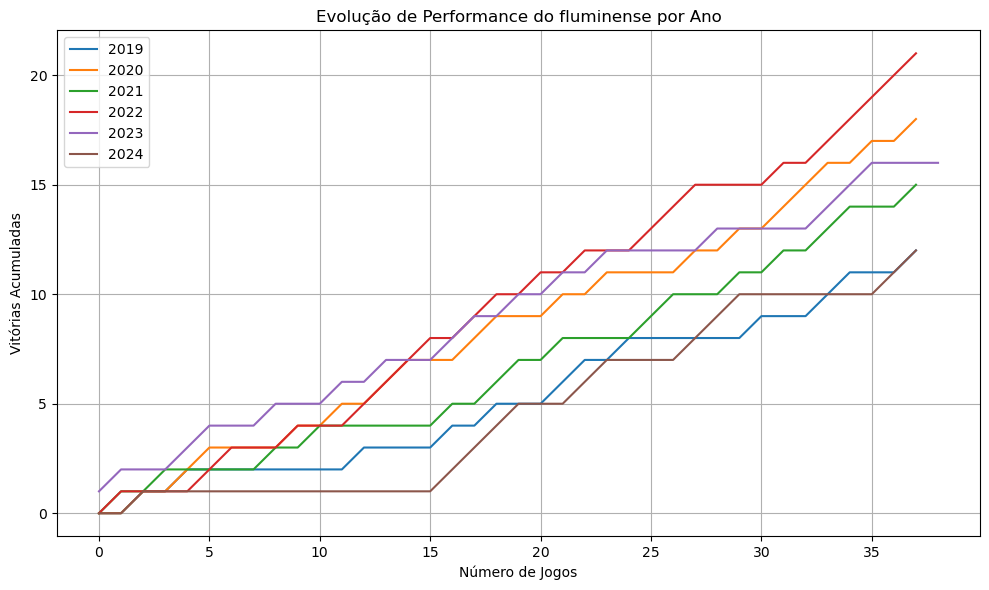

In [60]:
plt.figure(figsize=(10, 6))
for decade in team_games['year'].unique():
    subset = team_games[team_games['year'] == decade]
    plt.plot(range(len(subset)), subset['cumulative_win'], label=f'{decade}')
plt.xlabel('Número de Jogos')
plt.ylabel('Vitórias Acumuladas')
plt.title(f'Evolução de Performance do {team} por Ano')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()